# Project On Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
ic = pd.read_csv("insurance.csv")

In [3]:
ic

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
ic.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
ic.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
ic.shape

(1000, 40)

In [7]:
ic.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
ic.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
ic.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [11]:
ic.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
ic.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [13]:
ic.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [14]:
import sklearn.metrics
import seaborn as sns
from matplotlib import pyplot as plt

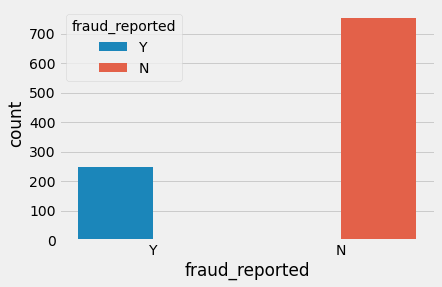

In [15]:
plt.style.use('fivethirtyeight')
fraud = sns.countplot(x='fraud_reported', data=ic, hue='fraud_reported')

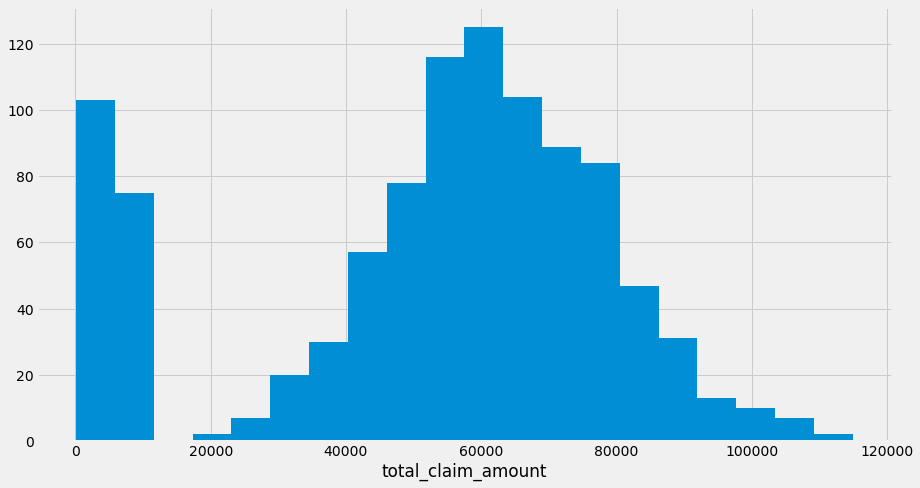

In [16]:
plt.figure(figsize=(30,70))

plt.subplot(8,2,1)
fig=ic.total_claim_amount .hist(bins=20)
fig.set_xlabel('total_claim_amount')
plt.show()

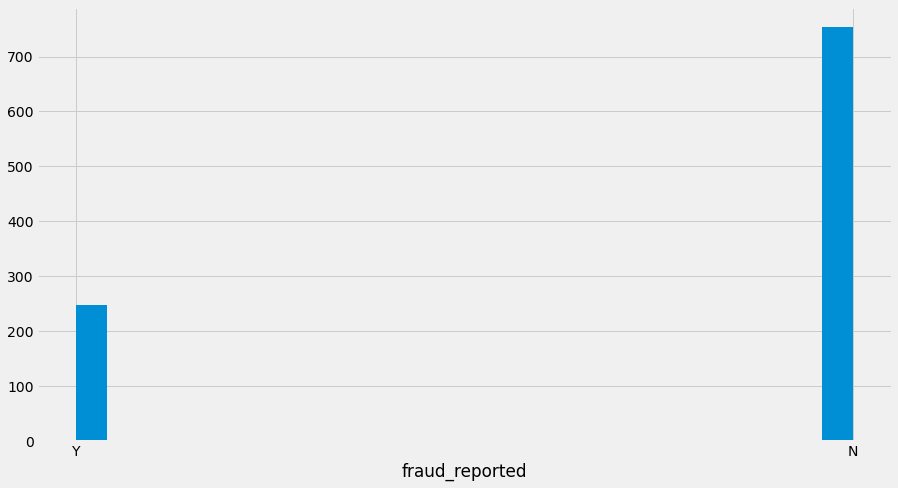

In [17]:
plt.figure(figsize=(30,70))

plt.subplot(8,2,1)
fig=ic.fraud_reported.hist(bins=25)
fig.set_xlabel('fraud_reported')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:807: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x00000187244B3E50> has a label of '_c39' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


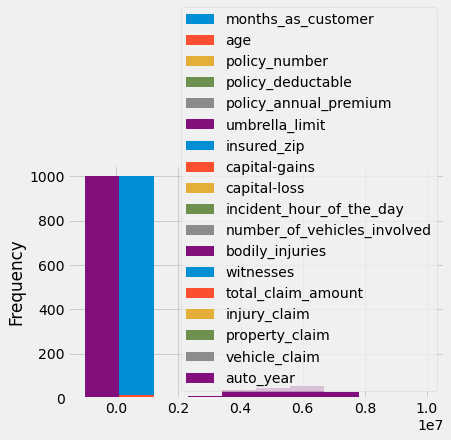

In [18]:
# Generate a Histogram plot for anomaly detection
ic.plot(kind='hist')
plt.show()

In [19]:
ic['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [20]:
ic['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

In [21]:
ic['property_claim'].value_counts()

property_claim
0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: count, Length: 626, dtype: int64

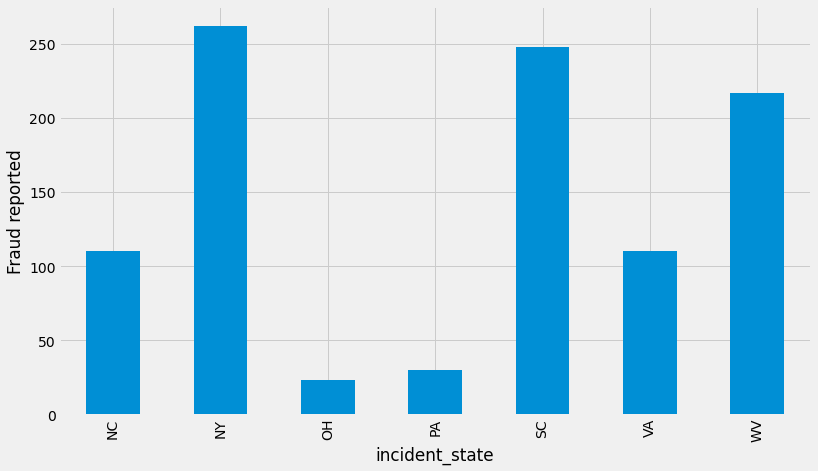

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,7))
ax = ic.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

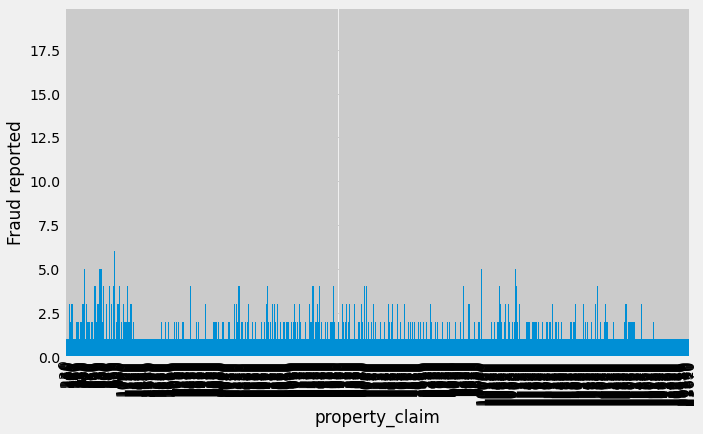

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic.groupby('property_claim').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

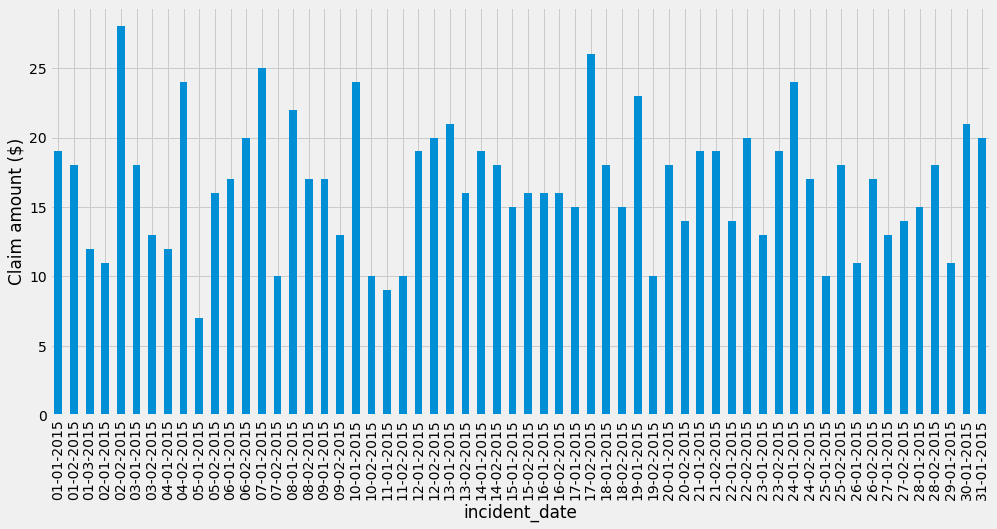

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = ic.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

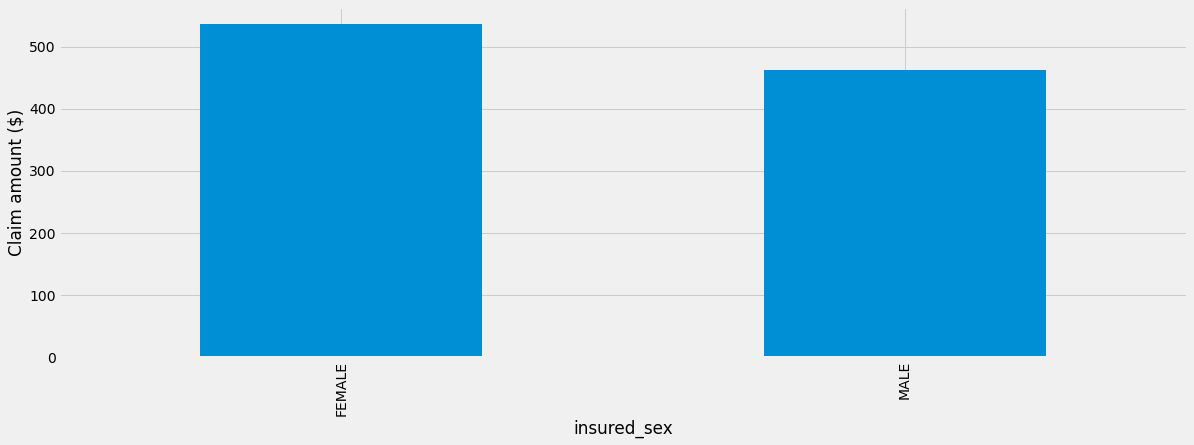

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = ic.groupby('insured_sex').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

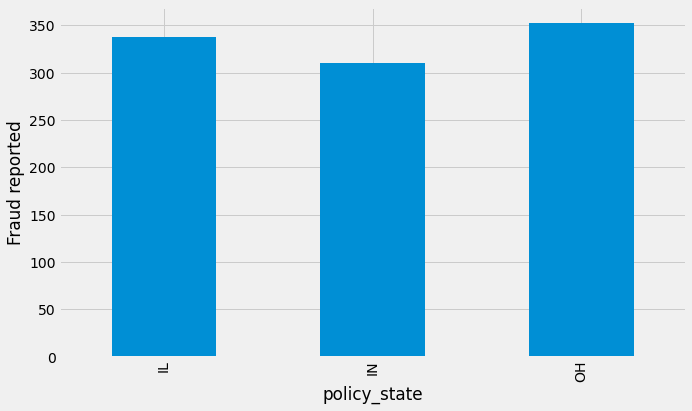

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

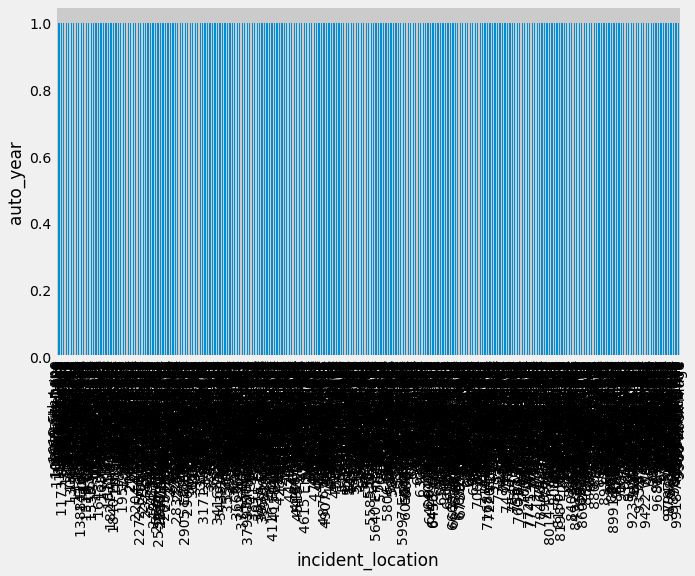

In [27]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = ic.groupby('incident_location').auto_year.count().plot.bar(ylim=0)
ax.set_ylabel('auto_year')
plt.show()

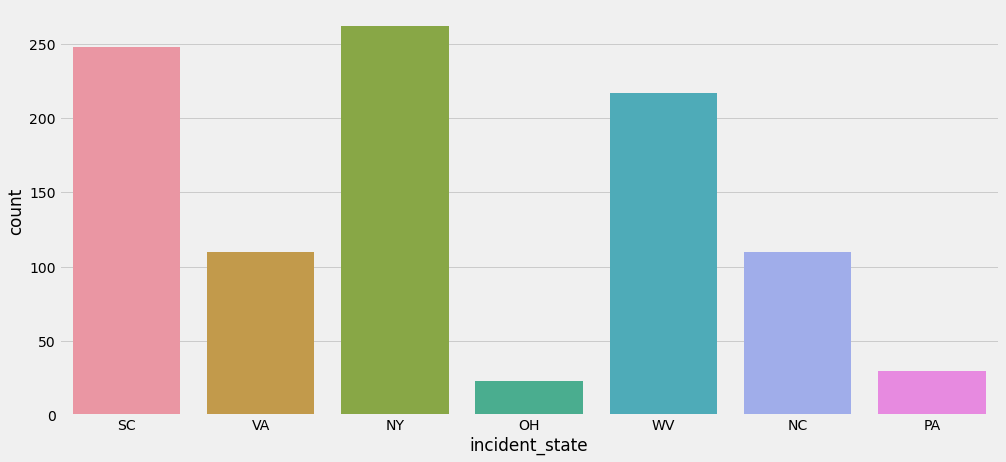

In [28]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(x='incident_state', data=ic)

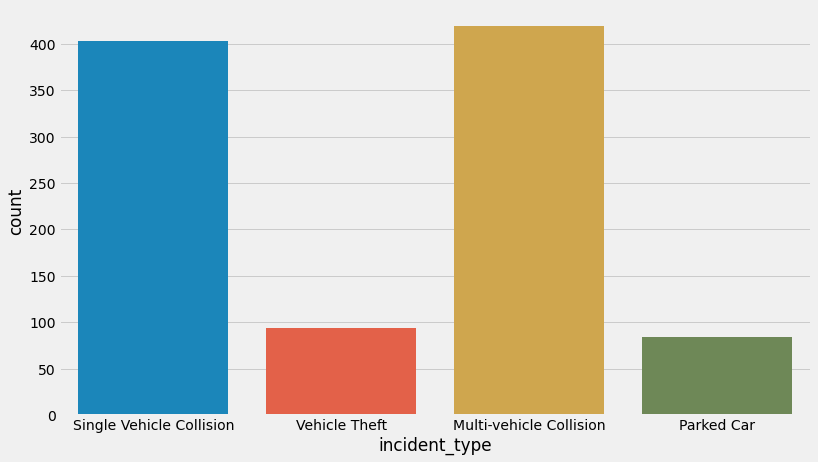

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,7))
ax = sns.countplot(x='incident_type', data=ic)

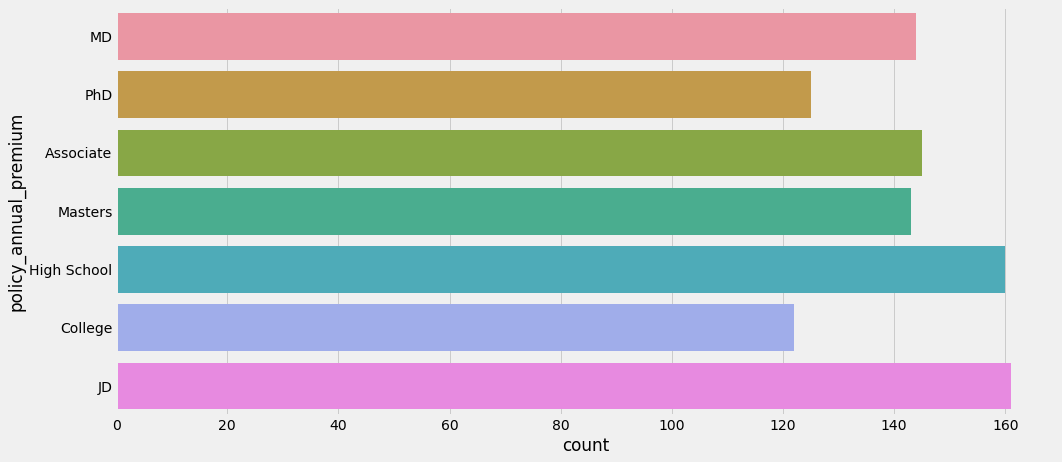

In [30]:
# Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(y = 'insured_education_level', data=ic) 
ax.set_ylabel('policy_annual_premium')
plt.show()


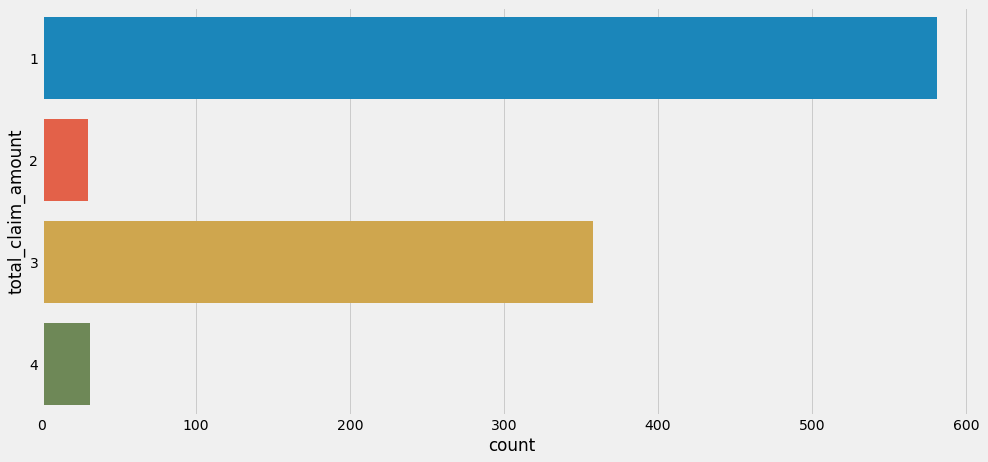

In [31]:
fig = plt.figure(figsize=(15,7))
ax = sns.countplot(y = 'number_of_vehicles_involved', data=ic) 
ax.set_ylabel('total_claim_amount')
plt.show()

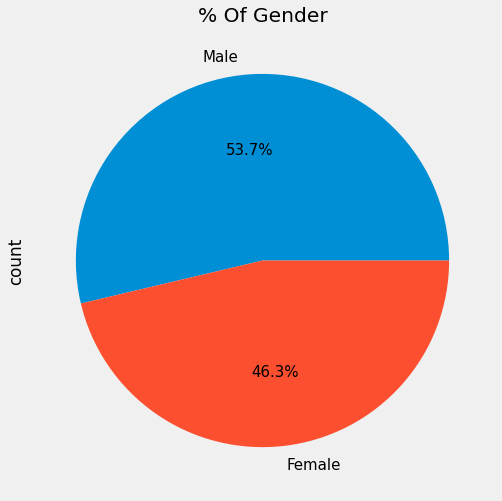

In [32]:
fig = plt.figure(figsize=(18,8))
ax = (ic['insured_sex'].value_counts()*100.0 /len(ic))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=15)                                                                           
ax.set_title('% Of Gender')
plt.show()

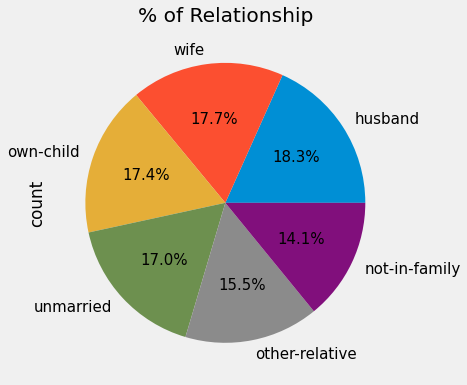

In [33]:
fig = plt.figure(figsize=(10,6))
ax = (ic['insured_relationship'].value_counts()*100.0 /len(ic))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=15)                                                                           
ax.set_title('% of Relationship')
plt.show()

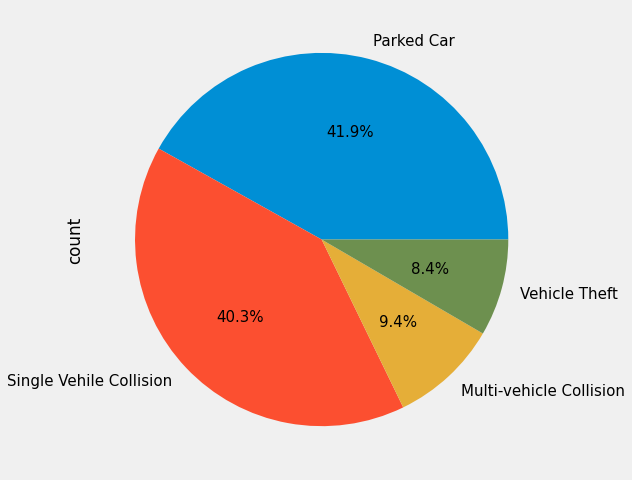

In [34]:
fig = plt.figure(figsize=(15,8))
ax = (ic['incident_type'].value_counts()*100.0 /len(ic))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=15) 

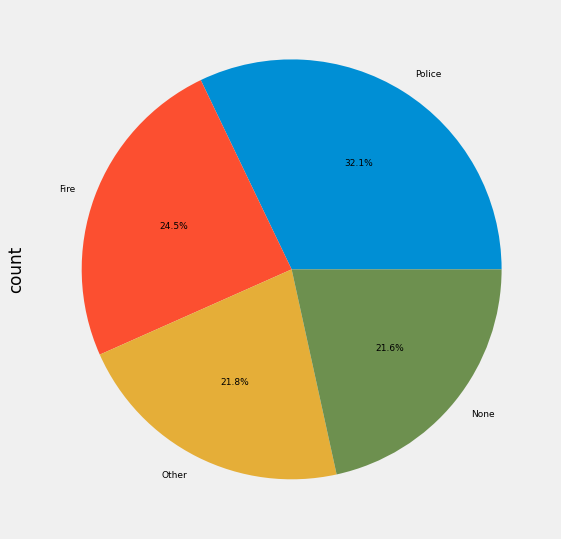

In [35]:
fig = plt.figure(figsize=(19,9))
ax = (ic['authorities_contacted'].value_counts()*100.0 /len(ic))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=9) 

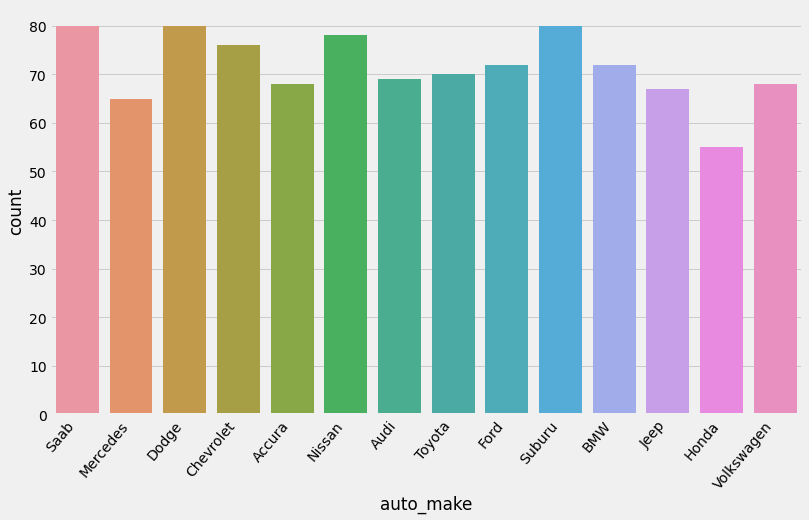

In [36]:
fig = plt.figure(figsize=(12,7))
ax = sns.countplot(x='auto_make', data=ic)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

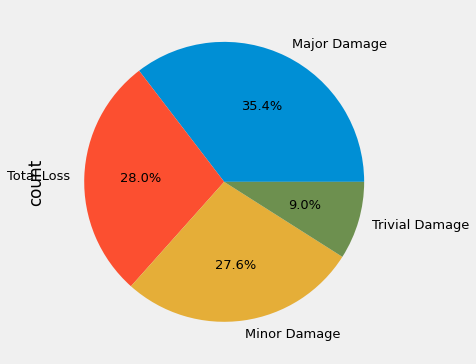

In [37]:
fig = plt.figure(figsize=(14,6))
ax = (ic['incident_severity'].value_counts()*100.0 /len(ic))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=13)  

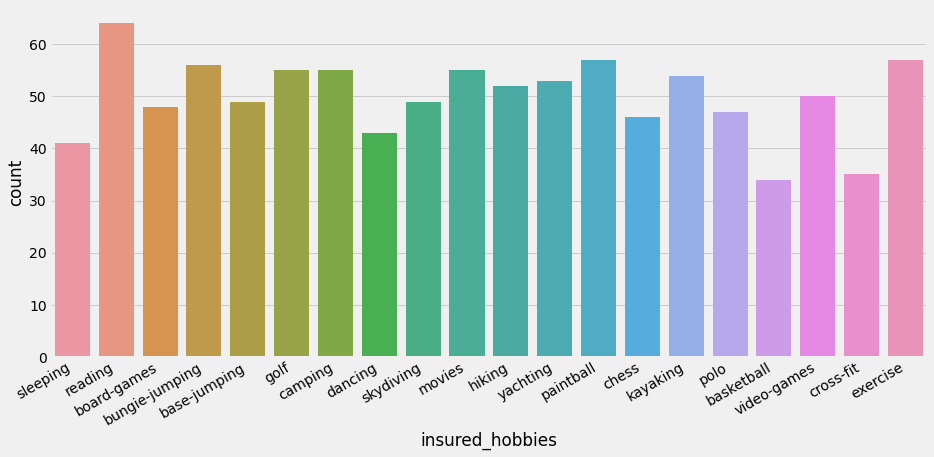

In [38]:
fig = plt.figure(figsize=(14,6))
ax = sns.countplot(x='insured_hobbies', data=ic)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

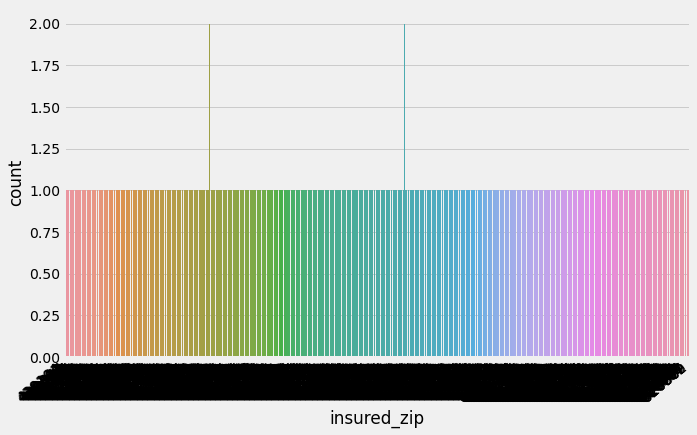

In [39]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_zip', data=ic)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [40]:
ic["insured_occupation"].value_counts()

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

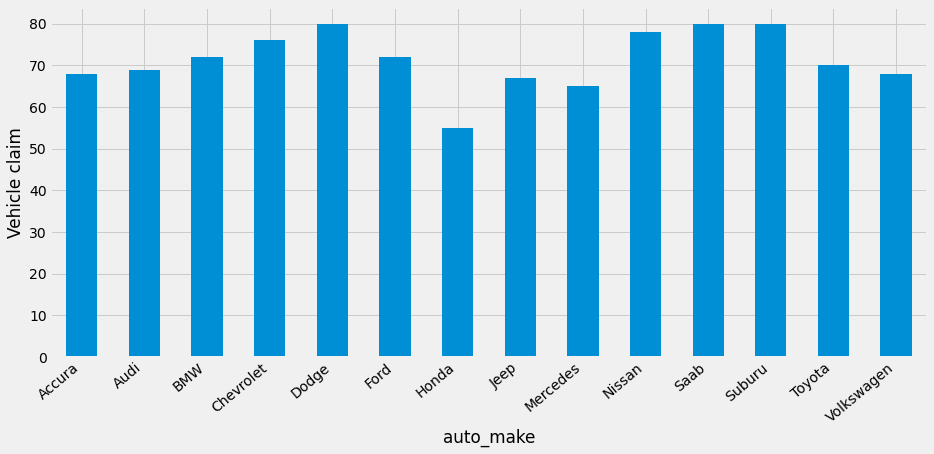

In [41]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,6))
ax= ic.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

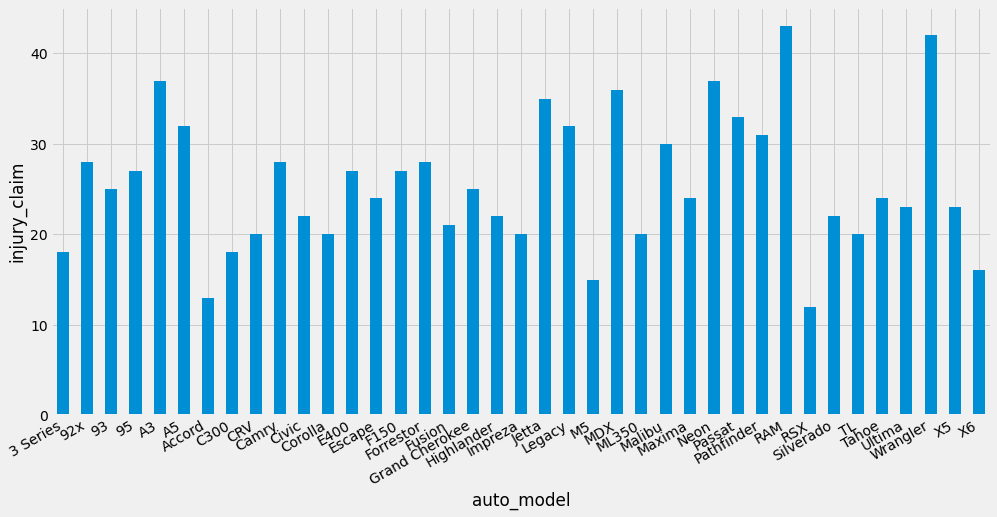

In [42]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax= ic.groupby('auto_model').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('injury_claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

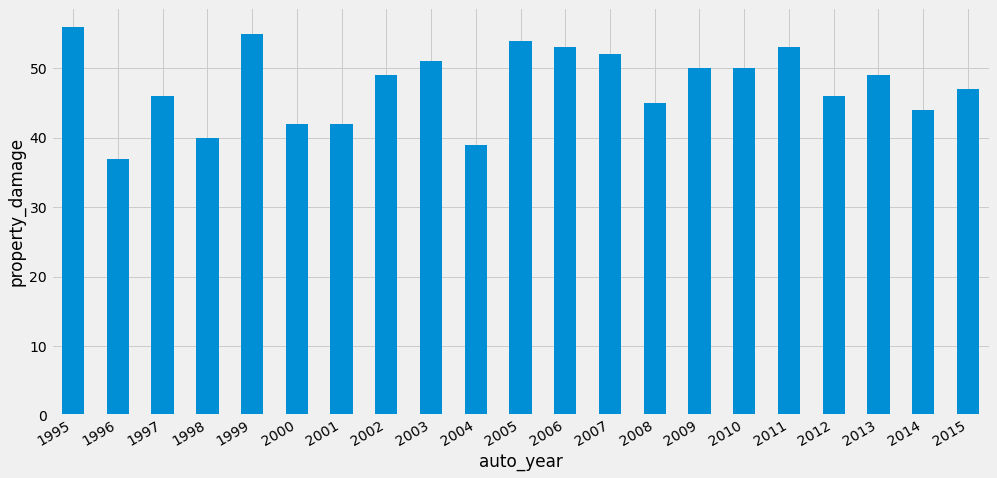

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax= ic.groupby('auto_year').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('property_damage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

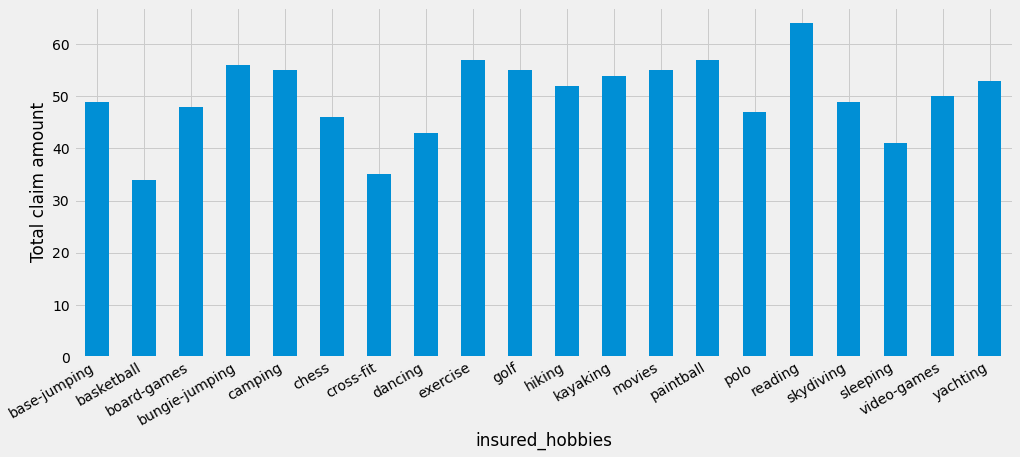

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,6))
ax= ic.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

# Data Cleaning and Processing

In [45]:
ic['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
ic['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

In [46]:
ic.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [47]:
ic.auto_year.value_counts()  # check the spread of years to decide on further action.

auto_year
1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: count, dtype: int64

In [48]:
ic['vehicle_age'] = 2018 - ic['auto_year'] # Deriving the age of the vehicle based on the year value 
ic['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [49]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
ic['incident_period_of_day'] = pd.cut(ic.incident_hour_of_the_day, bins, labels=names).astype(object)
ic[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [50]:
# Check on categorical variables:
ic.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [51]:
# dropping unimportant columns

ic = ic.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

ic.head(3)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,0,11,morning


In [52]:
# identify variables with '?' values
unknowns = {}
for i in list(ic.columns):
    if (ic[i]).dtype == object:
        j = np.sum(ic[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


In [53]:
ic.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

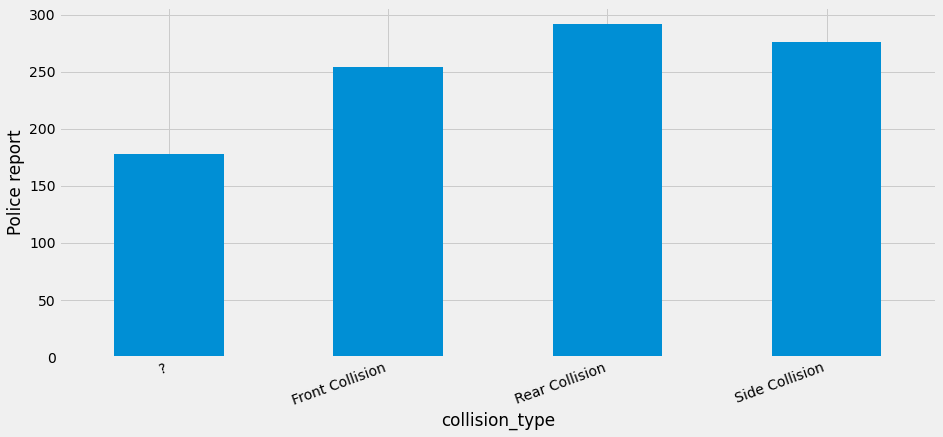

In [54]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,6))
ax= ic.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()


In [55]:
ic.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

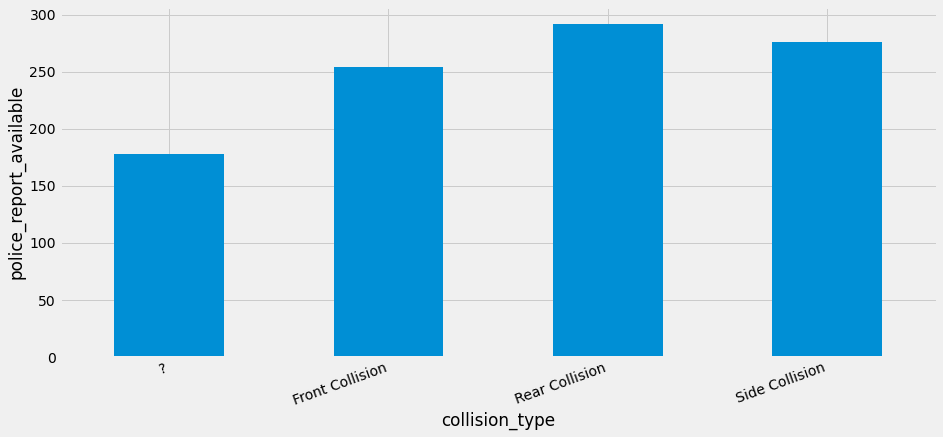

In [56]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,6))
ax= ic.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('police_report_available')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()


In [57]:
ic.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

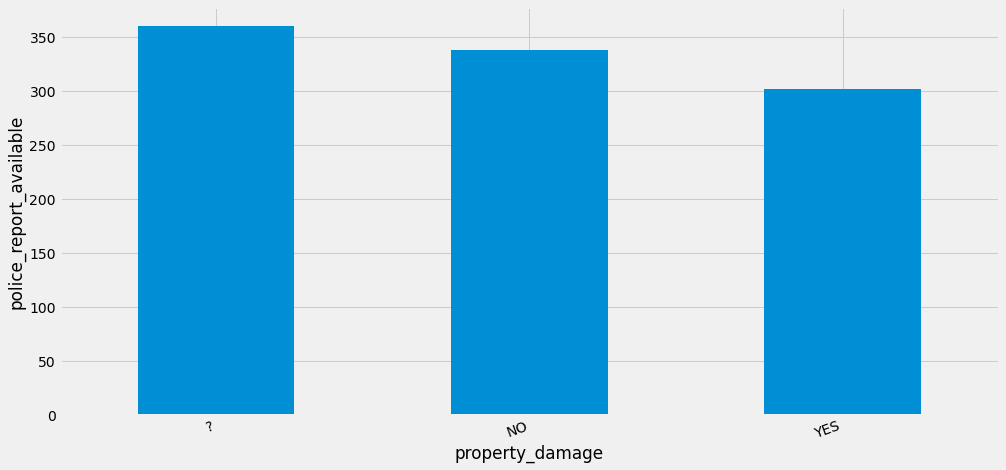

In [58]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax= ic.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('police_report_available')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [59]:
ic._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [60]:
ic._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [61]:
ic.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [62]:
dummies = pd.get_dummies(ic[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_day']])

dummies = dummies.join(ic[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,False,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,Side Collision,YES,YES,1
1,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,?,?,?,1
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,False,Rear Collision,NO,NO,0
3,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,Front Collision,?,NO,1
4,True,False,False,False,False,True,False,True,True,False,...,False,True,False,False,False,False,?,NO,NO,0


In [63]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [64]:
len(X.columns)

144

In [65]:
X.head(3)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,False,False,True,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,Side Collision,YES,YES
1,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,?,?,?
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,Rear Collision,NO,NO


In [66]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [69]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(15) 

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,False,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,Side Collision,1,1,3
1,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,?,0,0,0
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,False,Rear Collision,0,0,2
3,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,Front Collision,0,0,1
4,True,False,False,False,False,True,False,True,True,False,...,False,True,False,False,False,False,?,0,0,0
5,False,False,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,Rear Collision,0,0,2
6,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,Front Collision,0,0,1
7,True,False,False,True,False,False,False,True,True,False,...,False,False,False,False,True,False,Front Collision,0,1,1
8,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,Front Collision,0,1,1
9,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,Rear Collision,0,0,2


In [70]:
X = X.drop(columns = ['collision_type'])
X.head(3)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,False,False,True,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,1,1,3
1,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,0,0,0
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,0,0,2


In [71]:
X = pd.concat([X, ic._get_numeric_data()], axis=1)  # joining numeric columns
X.head(3)

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,False,False,True,False,True,False,False,True,False,False,...,0,1,1,2,71610,6510,13020,52080,1,14
1,False,True,False,False,True,False,False,True,False,False,...,0,1,0,0,5070,780,780,3510,1,11
2,False,False,True,True,False,False,True,False,False,False,...,0,3,2,3,34650,7700,3850,23100,0,11


In [72]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=159)

In [73]:
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=159)

# Data Modeling

# Logistic Regression

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X), 
                      index=X.index,
                     columns=X.columns)

In [77]:
X_scaled

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.530348,1.000000,0.000000,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,0.55
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.000000,0.043285,0.036364,0.032953,0.043276,0.40
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.349254,1.000000,0.666667,1.0,1.000000,0.300906,0.358974,0.162653,0.289722,0.40
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.486567,0.438344,0.000000,0.5,0.666667,0.551298,0.295571,0.267850,0.637187,0.05
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.656716,0.585959,0.000000,0.0,0.333333,0.055739,0.060606,0.027461,0.056359,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.333333,0.758579,0.813054,0.368399,0.767015,0.45
996,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.705473,1.000000,0.000000,1.0,1.000000,0.943912,0.842890,0.763836,0.908919,0.00
997,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.349254,1.000000,0.666667,1.0,1.000000,0.587006,0.349650,0.316857,0.659580,0.95
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.333333,0.408291,0.243357,0.220532,0.458800,0.85


In [78]:
Y=ic.iloc[:,16]
Y

0      Major Damage
1      Minor Damage
2      Minor Damage
3      Major Damage
4      Minor Damage
           ...     
995    Minor Damage
996    Major Damage
997    Minor Damage
998    Major Damage
999    Minor Damage
Name: incident_severity, Length: 1000, dtype: object

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2,random_state=50)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

1.0

# Linear Discriminant Analysis

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=(None))
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.841


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  750 250
length of y_train and y_test:  750 250


# Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

In [92]:
# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s


Baseline: N_features:  159
Baseline: Accuracy:  76.0
Cohen Kappa: 0.26
Baseline: Recall:  26.09

 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       181
           1       0.67      0.26      0.38        69

    accuracy                           0.76       250
   macro avg       0.72      0.61      0.61       250
weighted avg       0.74      0.76      0.72       250



[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [93]:
rfcg

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       verbose=1)

In [94]:
from sklearn.metrics import confusion_matrix

import itertools

In [95]:

#Evaluation of Model-Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

Confusion matrix
[[172   9]
 [ 51  18]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\3369554272.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

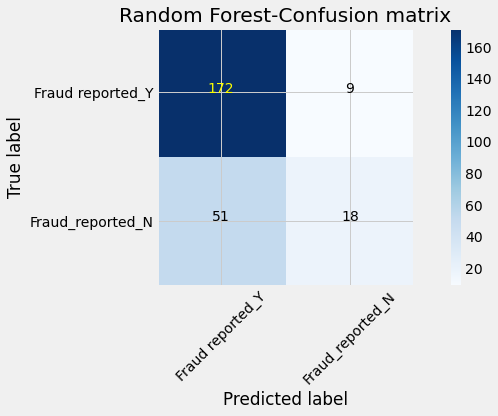

In [97]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

# Conclusion

# *************DONE*************